# Playground Zollman-effect



In [80]:
# Hello Max!

import numpy as np
from agent import Agent
from model import Model
from hybrid_networks_clean import rewire_network, randomize_network_v2, create_hybrid_network
from tqdm import tqdm


%load_ext autoreload
%autoreload 2                      

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
import opinionated
import matplotlib.pyplot as plt
plt.style.use("opinionated_rc")
import colormaps as cmaps 

Testing out our simulation-function:


In [91]:
n_agents = 1000
my_network = nx.complete_graph(n_agents) #create_hybrid_network(20,degree=5,p_preferential_attachment=.01)#nx.erdos_renyi_graph(n_agents, 0.009)

my_model = Model(my_network, n_experiments=1, uncertainty=0.01,agent_type = "bayes")


my_model.run_simulation(number_of_steps=10,show_bar=True)


  0%|          | 0/10 [00:00<?, ?it/s]

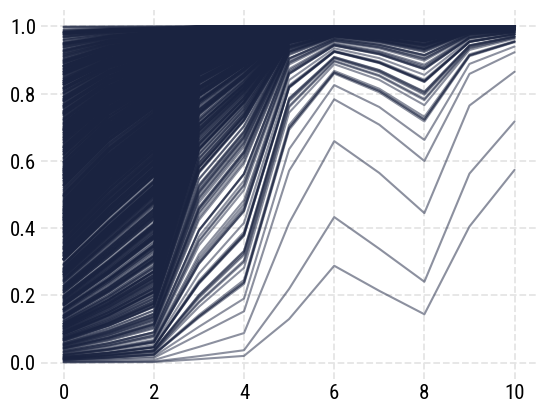

In [92]:
for agent_hist in my_model.agent_histories:

    plt.plot(agent_hist,c="#1a2340",alpha=.5)

In [ ]:
len(my_model.agent_histories[0])

# Setting up parameters
(Here we replicate the wheel, cycle, complete setup)

In [ ]:
import random
import networkx as nx

def create_graph(keyword, n_agents):
    if keyword == "complete":
        return nx.complete_graph(n_agents)
    elif keyword == "wheel":
        return nx.wheel_graph(n_agents)
    elif keyword == "cycle":
        return nx.cycle_graph(n_agents)
    else:
        raise ValueError("Invalid keyword. Please choose 'complete', 'wheel', or 'cycle'.")

def generate_parameters(n):
    params_list = []
    for _ in range(n):
        n_agents = random.randint(3, 20)
        network_keyword = random.choice(["complete", "wheel", "cycle"])
        network = create_graph(network_keyword, n_agents)
        uncertainty = 0.01
        n_experiments = random.randint(1, 1000)
        params = {
            "n_agents": n_agents,
            "network_type" : network_keyword,
            "network": network,
            "uncertainty": uncertainty,
            "n_experiments": n_experiments
        }
        params_list.append(params)
    return params_list

# Example usage:
# Generate a list of 5 parameter dictionaries
parameter_dictionaries = generate_parameters(50)


In [ ]:
parameter_dictionaries

[{'n_agents': 10,
  'network_type': 'cycle',
  'network': <networkx.classes.graph.Graph at 0x2ea3af810>,
  'uncertainty': 0.01,
  'n_experiments': 67},
 {'n_agents': 19,
  'network_type': 'cycle',
  'network': <networkx.classes.graph.Graph at 0x2eb08efd0>,
  'uncertainty': 0.01,
  'n_experiments': 75},
 {'n_agents': 8,
  'network_type': 'complete',
  'network': <networkx.classes.graph.Graph at 0x2eb094410>,
  'uncertainty': 0.01,
  'n_experiments': 917},
 {'n_agents': 13,
  'network_type': 'wheel',
  'network': <networkx.classes.graph.Graph at 0x2e9e46b50>,
  'uncertainty': 0.01,
  'n_experiments': 457},
 {'n_agents': 6,
  'network_type': 'cycle',
  'network': <networkx.classes.graph.Graph at 0x2eb095910>,
  'uncertainty': 0.01,
  'n_experiments': 806},
 {'n_agents': 17,
  'network_type': 'wheel',
  'network': <networkx.classes.graph.Graph at 0x2eb096090>,
  'uncertainty': 0.01,
  'n_experiments': 15},
 {'n_agents': 18,
  'network_type': 'wheel',
  'network': <networkx.classes.graph.Gr

In [ ]:
import numpy as np
import numbers

def run_simulation_with_params(param_dict, number_of_steps=1000, show_bar=False):
    # Extract the network directly since it's already a NetworkX graph object
    my_network = param_dict['network']
    # Other parameters are directly extracted from the dictionary
    my_model = Model(my_network, n_experiments=param_dict['n_experiments'], uncertainty=param_dict['uncertainty']
                    , agent_type="beta")
    # Run the simulation with predefined steps and show_bar option
    
    my_model.run_simulation(number_of_steps=number_of_steps, show_bar=show_bar)
  
    

    result_dict = {
        key: value 
        for key, value in param_dict.items() 
        if isinstance(value, (numbers.Number, str, tuple, list))}   
    result_dict['true_consensus'] = my_model.conclusion
    result_dict['true_consensus_alternative_stop'] = my_model.conclusion_alternative_stop
    
    return result_dict


parameter_dictionaries = generate_parameters(1000)  # Generate one for demonstration
result = run_simulation_with_params(parameter_dictionaries[1], number_of_steps=10000, show_bar=False)
print(result)


{'n_agents': 18, 'network_type': 'complete', 'uncertainty': 0.01, 'n_experiments': 148, 'true_consensus': 0.2222222222222222, 'true_consensus_alternative_stop': 0.2222222222222222}


In [ ]:


import pandas as pd
from tqdm import tqdm

# Ensure your run_simulation_with_params function and others are defined

def run_simulations(param_list, number_of_steps=1000, show_bar=False):
    def run_simulation(param_dict):
        return run_simulation_with_params(param_dict, number_of_steps=number_of_steps, show_bar=show_bar)
    
    results = []
    # Iterate over each parameter dictionary in the list
    for params in tqdm(param_list, desc="Running simulations"):
        result = run_simulation(params)
        results.append(result)
    
    # Convert the list of results into a Pandas DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
parameter_dictionaries = generate_parameters(5000)  # Generate parameter dictionaries
results_df = run_simulations(parameter_dictionaries, number_of_steps=1000, show_bar=False)
print(results_df)


Running simulations: 100%|██████████| 5000/5000 [12:35<00:00,  6.62it/s]

      n_agents network_type  uncertainty  n_experiments  true_consensus  \
0           13     complete         0.01            628        0.307692   
1           14     complete         0.01            422        0.357143   
2            4        wheel         0.01            801        0.750000   
3            4     complete         0.01            579        0.500000   
4            9     complete         0.01            890        0.333333   
...        ...          ...          ...            ...             ...   
4995         4        cycle         0.01            802        0.000000   
4996        16        wheel         0.01            113        0.000000   
4997        18        cycle         0.01            669        0.333333   
4998        19     complete         0.01            403        0.368421   
4999         9        wheel         0.01            899        0.333333   

     true_consensus_alternative_stop  
0                              False  
1                    

In [ ]:
results_df

,n_agents,network_type,uncertainty,n_experiments,true_consensus,true_consensus_alternative_stop
0,13,complete,0.01,628,0.307692,False
1,14,complete,0.01,422,0.357143,False
2,4,wheel,0.01,801,0.750000,0.75
3,4,complete,0.01,579,0.500000,0.5
4,9,complete,0.01,890,0.333333,0.333333
...,...,...,...,...,...,...
4995,4,cycle,0.01,802,0.000000,0.0
4996,16,wheel,0.01,113,0.000000,0.0
4997,18,cycle,0.01,669,0.333333,False
4998,19,complete,0.01,403,0.368421,False


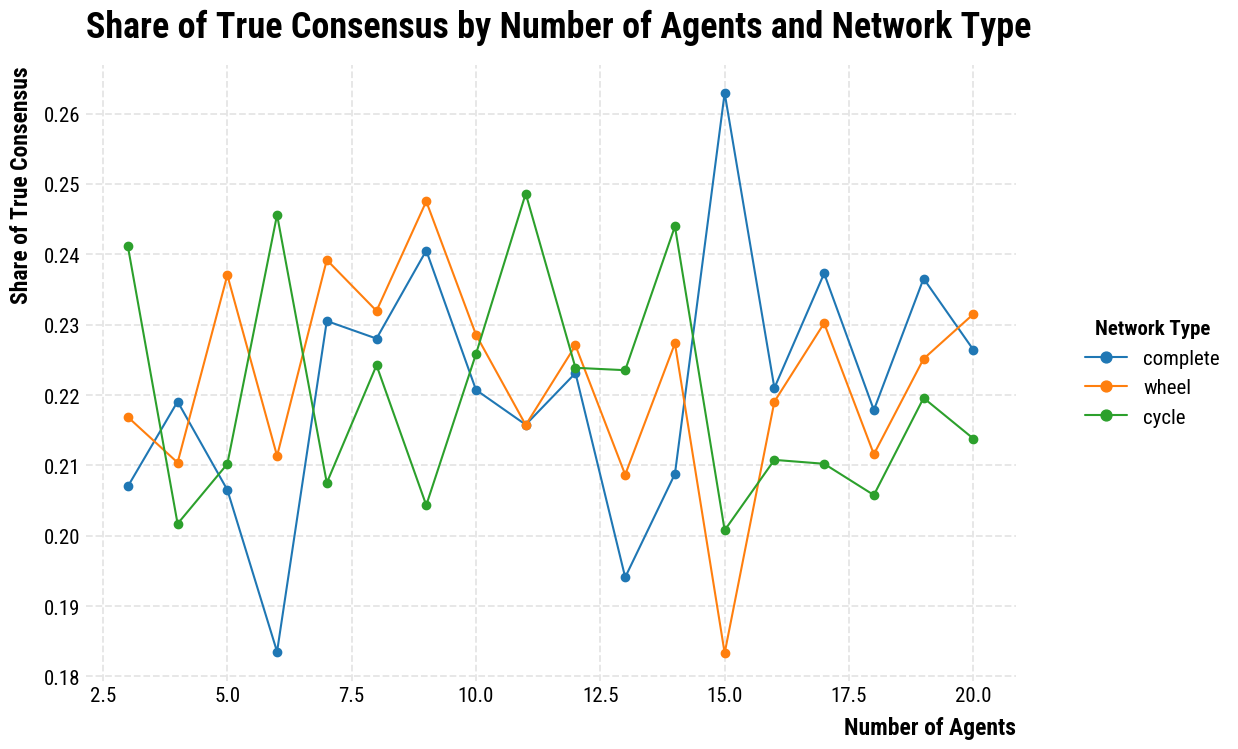

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with the data
#results_df['true_consensus'] = results_df['true_consensus'].astype(int)  # Convert True/False to 1/0

# Define bins for 'n_agents'
# bins = np.linspace(results_df['n_agents'].min(), results_df['n_agents'].max(), 9)  # Adjust number of bins as needed
# results_df['binned'] = pd.cut(results_df['n_agents'], bins, include_lowest=True)
# print(results_df['binned'])
# Calculate the share of true consensus within each bin, for each network type
grouped = results_df.groupby(['network_type', 'n_agents'])['true_consensus'].mean().reset_index()

# Preparing for the line plot
#grouped['mid_bin'] = grouped['binned'].apply(lambda x: x.mid).astype(float)  # Getting the midpoint of bins for plotting

# Plotting
plt.figure(figsize=(12, 8))

for network_type in results_df['network_type'].unique():
    subset = grouped[grouped['network_type'] == network_type]
    plt.plot(subset['n_agents'], subset['true_consensus'], marker='o', label=network_type)

plt.xlabel('Number of Agents')
plt.ylabel('Share of True Consensus')
plt.title('Share of True Consensus by Number of Agents and Network Type')
opinionated.add_legend(title='Network Type')

plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from pygam import LogisticGAM, s
from sklearn.model_selection import train_test_split

# Splitting the DataFrame by network type
network_types = results_df['network_type'].unique()

my_gams = {}

for network_type in network_types:
    # Subset the DataFrame by network type
    subset = results_df[results_df['network_type'] == network_type]
    
    # Preparing the data
    X = subset[['n_agents']]
    y = subset['true_consensus']#.astype(int)  # Convert boolean to integer
    
    # Splitting the data into training and testing sets for model validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fitting the Logistic GAM model
    gam = LogisticGAM(s(0,n_splines=6)).fit(X_train, y_train)
    
    # Storing the model
    my_gams[network_type] = gam
    
    # Optionally, you can print out model accuracy or other statistics here
    print(f"Model for {network_type}:")
    print(f"Accuracy on training data: {gam.accuracy(X_train, y_train)}")
    print(f"Accuracy on test data: {gam.accuracy(X_test, y_test)}")
    print("-" * 30)


Model for complete:
Accuracy on training data: 0.14634146341463414
Accuracy on test data: 0.17038539553752535
------------------------------
Model for wheel:
Accuracy on training data: 0.14766839378238342
Accuracy on test data: 0.13078470824949698
------------------------------
Model for cycle:
Accuracy on training data: 0.14429530201342283
Accuracy on test data: 0.130859375
------------------------------


/Users/Noich001/anaconda3/lib/python3.11/site-packages/pygam/pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
/Users/Noich001/anaconda3/lib/python3.11/site-packages/pygam/pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll
/Users/Noich001/anaconda3/lib/python3.11/site-packages/pygam/pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
/Users/Noich001/anaconda3/lib/python3.11/site-packages/pygam/pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll
/Users/Noich001/anaconda3/lib/python3.11/site-packages/pygam/pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
/Users/Noich001/anaconda3/lib/python3.11/site-packages/pygam/p

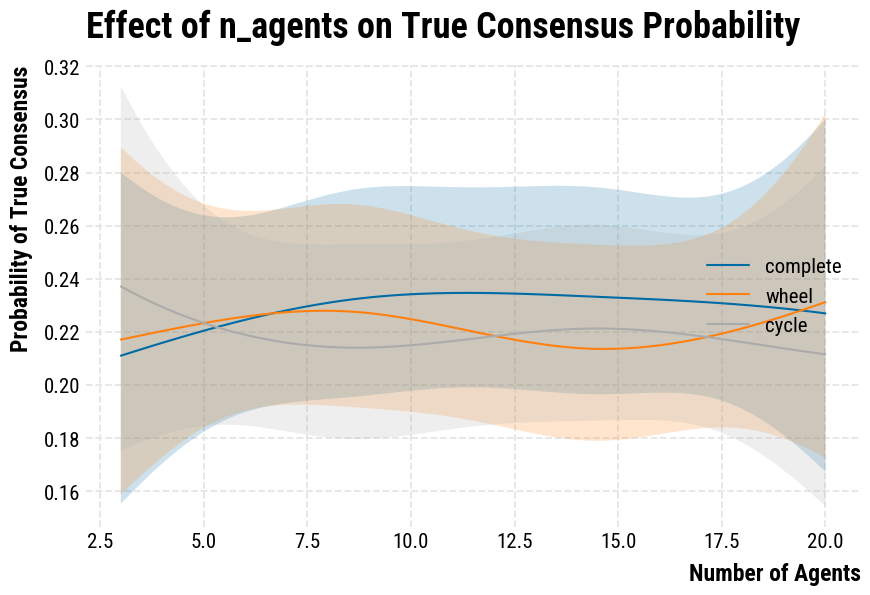

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the size of the figure
plt.figure(figsize=(10, 6))


cmap= cmaps.colorblind_10

X_range = np.linspace(X['n_agents'].min(), X['n_agents'].max(), 100)


colors =[cmap(0), cmap(1/cmap.N), cmap(1/cmap.N*2)]

for i, (network_type, gam) in enumerate(my_gams.items()):
    conf = gam.confidence_intervals(X_range.reshape(-1, 1), width=0.95, quantiles=None)
    plt.fill_between(X_range, conf[:, 0], conf[:, 1], facecolor=colors[i], alpha=0.2, interpolate=True)


for i, (network_type, gam) in enumerate(my_gams.items()):
    # Generating a range of values for n_agents to predict and plot
    
    
    # Predicting with the model
    #y_pred, conf = pdep, confi = model.partial_dependence(term=0, width=.95)
    y_pred = gam.predict_proba(X_range.reshape(-1, 1))

    
    # Plotting predicted probabilities
    plt.plot(X_range, y_pred,c=colors[i], label=f'{network_type}')
    
    # Plotting observed data

    # observed_data = results_df[results_df['network_type'] == network_type]
    # plt.scatter(observed_data['n_agents'] + np.random.rand(len(observed_data)), observed_data['true_consensus'], 
    #             alpha=0.01, c='grey',marker=2)


# Adding title, labels, and legend
plt.title('Effect of n_agents on True Consensus Probability')
plt.xlabel('Number of Agents')
plt.ylabel('Probability of True Consensus')
plt.legend()
plt.show()


9

# Tunable networks

In [ ]:
import random
import networkx as nx



def generate_parameters(n):
    params_list = []
    for _ in range(n):
        n_agents = random.randint(3, 15)
        degree = random.randint(1, n_agents-1)
        p_preferential_attachment = random.uniform(0, 1)
        network = create_hybrid_network(n_agents, degree=degree, p_preferential_attachment=p_preferential_attachment)
        uncertainty = 0.001
        n_experiments = 1000 #random.randint(1, 1000)
        params = {
            "n_agents": n_agents,
            "degree": degree,
            "p_preferential_attachment": p_preferential_attachment,
            "network": network,
            "uncertainty": uncertainty,
            "n_experiments": n_experiments
        }
        params_list.append(params)
    return params_list

# Example usage:
# Generate a list of 5 parameter dictionaries
parameter_dictionaries = generate_parameters(50)


In [ ]:
parameter_dictionaries = generate_parameters(10000)  # Generate parameter dictionaries
results_df = run_simulations(parameter_dictionaries, number_of_steps=100000, show_bar=False)
print(results_df)


Running simulations: 100%|██████████| 10000/10000 [08:56<00:00, 18.63it/s]

      n_agents  degree  p_preferential_attachment  uncertainty  n_experiments  \
0            6       5                   0.915802        0.001           1000   
1            3       1                   0.616978        0.001           1000   
2           14       6                   0.702993        0.001           1000   
3           10       3                   0.456230        0.001           1000   
4           14       8                   0.999116        0.001           1000   
...        ...     ...                        ...          ...            ...   
9995        11       3                   0.269122        0.001           1000   
9996         8       5                   0.198059        0.001           1000   
9997        13       8                   0.666481        0.001           1000   
9998         3       1                   0.946133        0.001           1000   
9999         6       4                   0.726391        0.001           1000   

      true_consensus  true_

In [ ]:
 
    # Preparing the data
X = results_df[['n_agents', 'degree', 'p_preferential_attachment']]
y = results_df['true_consensus'].astype(int)  # Convert boolean to integer

# Splitting the data into training and testing sets for model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the Logistic GAM model
gam = LogisticGAM(s(0,n_splines=6) + s(1,n_splines=6) + s(2,n_splines=6) ).fit(X_train, y_train)

print(f"Model for {network_type}:")
print(f"Accuracy on training data: {gam.accuracy(X_train, y_train)}")
print(f"Accuracy on test data: {gam.accuracy(X_test, y_test)}")
print(gam.summary())


Model for cycle:
Accuracy on training data: 0.728
Accuracy on test data: 0.7343333333333333
LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     10.9428
Link Function:                        LogitLink Log Likelihood:                                 -3786.6537
Number of Samples:                         7000 AIC:                                             7595.1931
                                                AICc:                                            7595.2373
                                                UBRE:                                               3.0863
                                                Scale:                                                 1.0
                                                Pseu

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_87535/3925743412.py:14: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


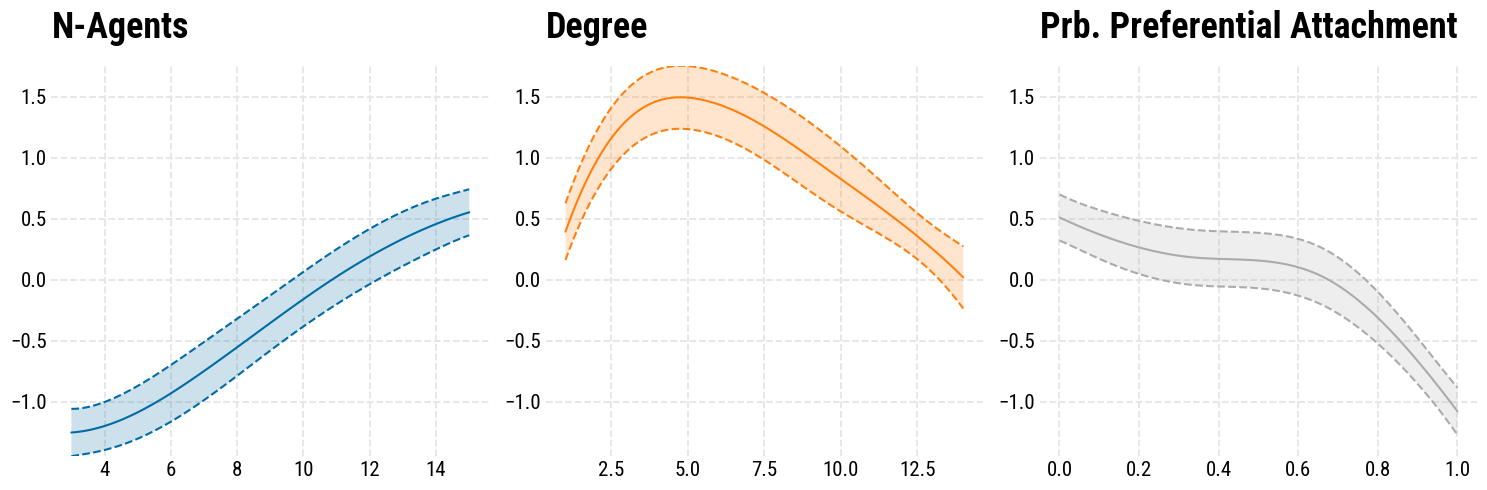

In [ ]:
import matplotlib.pyplot as plt

# Suppose `gam` is your model and `gam.terms` contains the terms used in the model.
# First, determine the number of plots (ignoring the intercept)
plot_count = sum(not term.isintercept for term in gam.terms)

# Start the figure
plt.figure(figsize=(15, 5))  # Adjust the size as needed

current_plot = 1
# Initialize a list to store y-limits
y_limits = []
labels =['N-Agents', 'Degree', 'Prb. Preferential Attachment']
# First pass: compute the y-axis limits for all plots
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    y_limits.append((min(pdep.min(), confi.min()), max(pdep.max(), confi.max())))

# Global y limits
global_y_min = min(limit[0] for limit in y_limits)
global_y_max = max(limit[1] for limit in y_limits)

# Second pass: plot with standardized y limits
current_plot = 1
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    # Set the subplot position
    plt.subplot(1, plot_count, current_plot)
    plt.plot(XX[:, term.feature], pdep,c=colors[i])
    plt.plot(XX[:, term.feature], confi, c=colors[i], ls='--')
    
    plt.fill_between(XX[:, term.feature], confi[:, 0], confi[:, 1], facecolor=colors[i], alpha=0.2, interpolate=True)

    plt.ylim(global_y_min, global_y_max)  # Set global y limits
    plt.title(labels[i])
    plt.xlabel('')  # Remove x-axis label
    plt.ylabel('')  # Remove y-axis label


    current_plot += 1  # Move to the next plot position

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


{'n_agents': 3, 'degree': 2, 'p_preferential_attachment': 0.10901230254485395, 'network': <networkx.classes.digraph.DiGraph object at 0x30223c090>, 'uncertainty': 0.001, 'n_experiments': 1000}


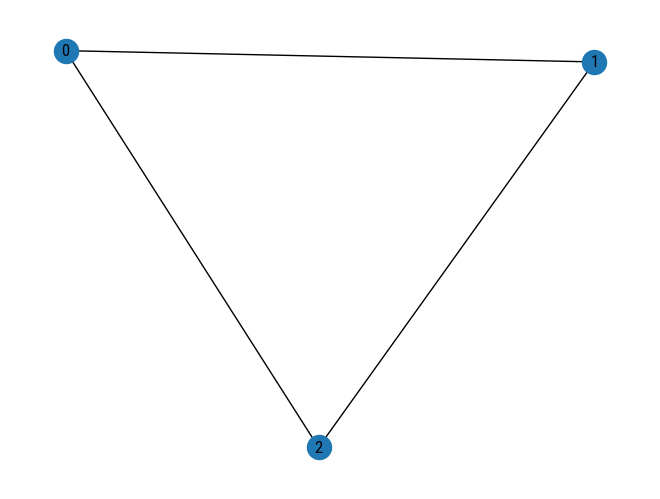

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Get the network from the parameter dictionary
params = parameter_dictionaries[30]
print(params)
network = params['network']

# Create a graph from the network
graph = nx.Graph(network)

# Plot the graph
nx.draw(graph, with_labels=True)
plt.show()
